In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv


### 1. Preparações

In [2]:
dataset = pd.read_csv("/kaggle/input/santander-customer-satisfaction/train.csv")

In [3]:
COLUNAS_CONSTANTES = [coluna for coluna in dataset.columns if dataset[coluna].nunique() == 1]
dataset = dataset.drop(columns = COLUNAS_CONSTANTES)
dataset.shape

(76020, 337)

In [4]:
ID = dataset.ID
TARGET = dataset.TARGET

dataset.drop(columns = "ID", inplace = True)
dataset.drop(columns = "TARGET", inplace = True)

In [6]:
dataset.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


#### 1.1 Escalando o Conjunto

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset_scaled = scaler.fit_transform(dataset.copy())

dataset_scaled = pd.DataFrame(dataset_scaled, columns = dataset.columns)
dataset_scaled.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001545
1,0.999764,0.29,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002003
2,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002822
3,0.999764,0.32,0.0,0.01513,0.009275,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002671
4,0.999764,0.34,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091


#### 1.2 Undersampling e Oversampling
(Vamos verificar a velocidade de treinamento e a performance de rede com o Over)

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

SEED = 912039

In [14]:
smote = SMOTE(random_state = SEED)
x_smote, y_smote = smote.fit_resample(dataset_scaled, TARGET)
dataset_smote = pd.concat([x_smote, y_smote], axis = 1)
dataset_smote.TARGET.value_counts()

TARGET
0    73012
1    73012
Name: count, dtype: int64

In [15]:
sampler = RandomUnderSampler(random_state = SEED)
x_under, y_under = sampler.fit_resample(dataset_scaled, TARGET)
dataset_under = pd.concat([x_under, y_under], axis = 1)
dataset_under.TARGET.value_counts()

TARGET
0    3008
1    3008
Name: count, dtype: int64

In [16]:
y_oversampling = dataset_smote.TARGET
y_undersampling = dataset_under.TARGET

dataset_smote.drop("TARGET", axis = 1, inplace = True)
dataset_under.drop("TARGET", axis = 1, inplace = True)

### 2. Treinamento com Undersampling

A princípio, vamos criar uma rede como determinado em (Gérion, 2021) e otimizar sua taxa de aprendizado para comparar valores. Também vamos analisar como a rede comporta-se com o Oversampling. Após isso, podemos, possivelmente, otimizar outros hiperparâmetros.

> GÉRION, Aurélien. __Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & Tensorflow: conceitos, ferramentas e técnicas para a construção de sistemas inteligentes.__ 2021, 2ª Edição.

In [17]:
from tensorflow import keras

#### Taxa de Aprendizado 0.001

In [34]:
modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [36]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
treinamento = modelo.fit(dataset_under, y_undersampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
151/151 [==============================] - 2s 4ms/step - loss: 0.6043 - accuracy: 0.6735 - val_loss: 0.7962 - val_accuracy: 0.6603
Epoch 2/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5692 - accuracy: 0.7057 - val_loss: 0.7731 - val_accuracy: 0.6645
Epoch 3/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.7330 - val_loss: 0.7850 - val_accuracy: 0.5498
Epoch 4/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7359 - val_loss: 0.6967 - val_accuracy: 0.6661
Epoch 5/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7471 - val_loss: 0.8597 - val_accuracy: 0.5498
Epoch 6/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7471 - val_loss: 0.8192 - val_accuracy: 0.5615
Epoch 7/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7558 - val_loss: 0.6598 - val_accuracy: 0.6894

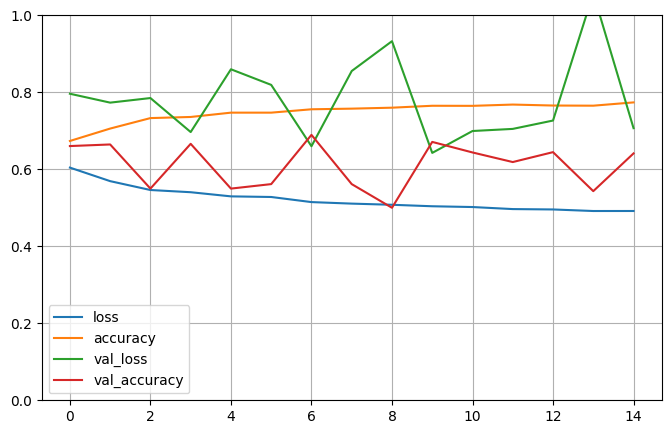

In [38]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

O gráfico mostra um resultado aparente de Overfitting. Isso pode indicar que as Redes Neurais se saiam melhor em casos de Oversampling neste conjunto. Antes de testarmos isso, vamos ajustar a taxa de aprendizado.

#### Taxa de Aprendizado 0.0001

In [40]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_under, y_undersampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
151/151 [==============================] - 1s 4ms/step - loss: 0.6790 - accuracy: 0.5677 - val_loss: 0.8339 - val_accuracy: 0.0000e+00
Epoch 2/100
151/151 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.6255 - val_loss: 0.8863 - val_accuracy: 0.0266
Epoch 3/100
151/151 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.6721 - val_loss: 0.8927 - val_accuracy: 0.6154
Epoch 4/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.6920 - val_loss: 0.8443 - val_accuracy: 0.6445
Epoch 5/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5859 - accuracy: 0.6912 - val_loss: 0.7990 - val_accuracy: 0.6487
Epoch 6/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.6918 - val_loss: 0.8145 - val_accuracy: 0.6478
Epoch 7/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.6933 - val_loss: 0.7760 - val_accuracy: 0.

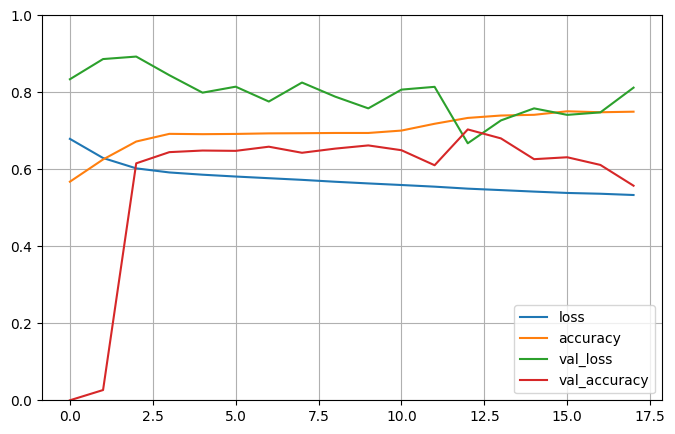

In [41]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

#### Taxa de Aprendizado 0.00001

In [42]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.00001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_under, y_undersampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
151/151 [==============================] - 1s 4ms/step - loss: 0.6974 - accuracy: 0.4225 - val_loss: 0.6858 - val_accuracy: 0.6686
Epoch 2/100
151/151 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5665 - val_loss: 0.7020 - val_accuracy: 0.2359
Epoch 3/100
151/151 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.6214 - val_loss: 0.7159 - val_accuracy: 0.1919
Epoch 4/100
151/151 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6438 - val_loss: 0.7283 - val_accuracy: 0.1802
Epoch 5/100
151/151 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.6401 - val_loss: 0.7408 - val_accuracy: 0.0814
Epoch 6/100
151/151 [==============================] - 1s 3ms/step - loss: 0.6703 - accuracy: 0.6243 - val_loss: 0.7546 - val_accuracy: 0.0000e+00


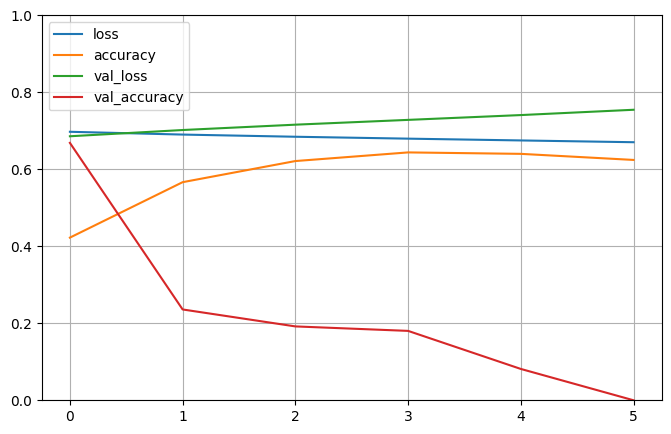

In [43]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

#### Taxa de Aprendizado 0.01

In [44]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_under, y_undersampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
151/151 [==============================] - 1s 4ms/step - loss: 0.6023 - accuracy: 0.6818 - val_loss: 0.7697 - val_accuracy: 0.6786
Epoch 2/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7138 - val_loss: 0.7646 - val_accuracy: 0.6204
Epoch 3/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7126 - val_loss: 0.8532 - val_accuracy: 0.5174
Epoch 4/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.7276 - val_loss: 0.7888 - val_accuracy: 0.6412
Epoch 5/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7479 - val_loss: 0.6905 - val_accuracy: 0.6595
Epoch 6/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7463 - val_loss: 0.8856 - val_accuracy: 0.5498
Epoch 7/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7490 - val_loss: 0.8681 - val_accuracy: 0.5490

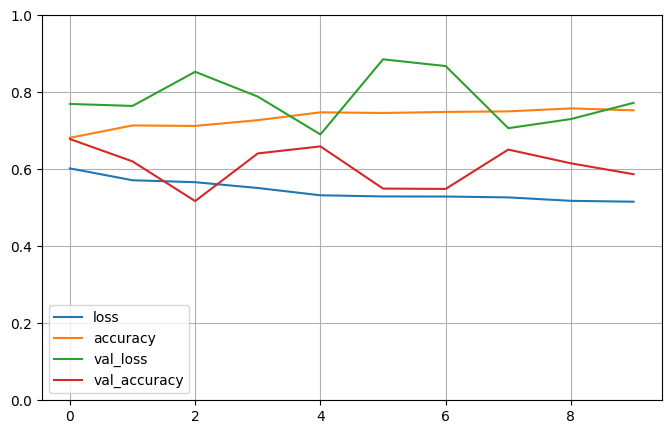

In [45]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

#### Taxa de Aprendizado 0.1

In [47]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.1), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_under, y_undersampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
151/151 [==============================] - 1s 4ms/step - loss: 0.6752 - accuracy: 0.6513 - val_loss: 0.7302 - val_accuracy: 0.7068
Epoch 2/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.6899 - val_loss: 0.8161 - val_accuracy: 0.5341
Epoch 3/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.6771 - val_loss: 0.5732 - val_accuracy: 0.8571
Epoch 4/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7273 - val_loss: 0.7212 - val_accuracy: 0.6877
Epoch 5/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7253 - val_loss: 0.6835 - val_accuracy: 0.7666
Epoch 6/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7103 - val_loss: 0.9785 - val_accuracy: 0.5415
Epoch 7/100
151/151 [==============================] - 0s 3ms/step - loss: 0.5571 - accuracy: 0.7278 - val_loss: 0.9534 - val_accuracy: 0.5407

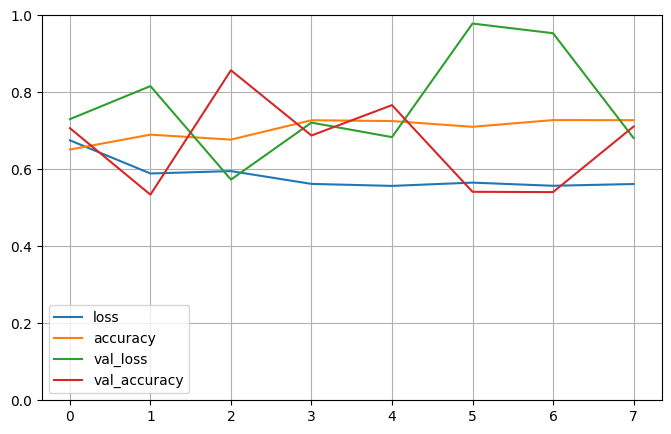

In [48]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

O ajuste de taxa de aprendizado não gerou resultados produtivos. Ainda que outros hiperparâmetros, como o batch_size possam ser ajustados para avaliar o modelo, vamos agora investigar a performance para Oversampling

### 3. Treinamento com Oversampling

In [49]:
modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.5094 - accuracy: 0.7497 - val_loss: 0.7233 - val_accuracy: 0.6362
Epoch 2/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.4760 - accuracy: 0.7730 - val_loss: 0.6105 - val_accuracy: 0.6600
Epoch 3/100
3651/3651 [==============================] - 9s 3ms/step - loss: 0.4644 - accuracy: 0.7785 - val_loss: 0.5101 - val_accuracy: 0.7658
Epoch 4/100
3651/3651 [==============================] - 9s 2ms/step - loss: 0.4558 - accuracy: 0.7827 - val_loss: 0.5971 - val_accuracy: 0.7186
Epoch 5/100
3651/3651 [==============================] - 9s 2ms/step - loss: 0.4482 - accuracy: 0.7861 - val_loss: 0.4486 - val_accuracy: 0.8018
Epoch 6/100
3651/3651 [==============================] - 9s 3ms/step - loss: 0.4409 - accuracy: 0.7899 - val_loss: 0.6675 - val_accuracy: 0.6420
Epoch 7/100
3651/3651 [==============================] - 9s 3ms/step - loss: 0.4345 - accuracy: 0.7933 - val_loss: 0.5045 - val_

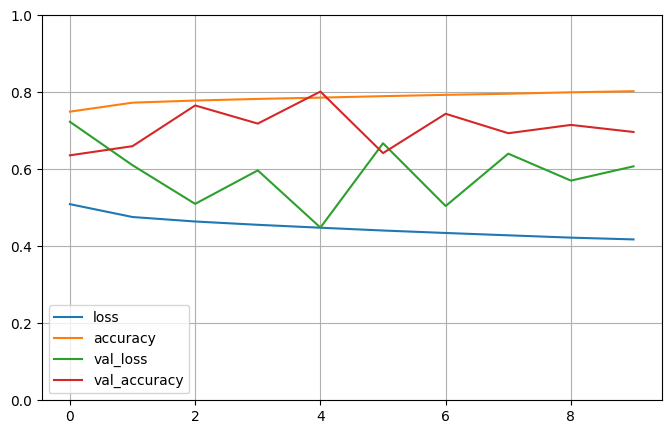

In [50]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

O mesmo comportamento do primeiro caso de Undersampling. Vamos tentar também ajustar a taxa de aprendizado.

#### Taxa de Aprendizado 0.0001

In [51]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
3651/3651 [==============================] - 11s 3ms/step - loss: 0.5521 - accuracy: 0.7220 - val_loss: 0.8163 - val_accuracy: 0.5269
Epoch 2/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.5045 - accuracy: 0.7592 - val_loss: 0.6764 - val_accuracy: 0.6355
Epoch 3/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.4871 - accuracy: 0.7659 - val_loss: 0.7117 - val_accuracy: 0.6210
Epoch 4/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.4757 - accuracy: 0.7708 - val_loss: 0.7011 - val_accuracy: 0.6266
Epoch 5/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.4680 - accuracy: 0.7759 - val_loss: 0.7292 - val_accuracy: 0.6060
Epoch 6/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.4623 - accuracy: 0.7795 - val_loss: 0.5653 - val_accuracy: 0.6948
Epoch 7/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.4570 - accuracy: 0.7820 - val_loss: 0.5944 -

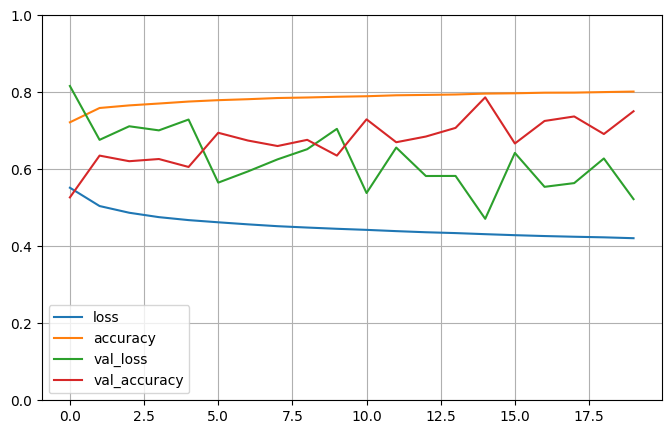

In [52]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

#### Taxa de Aprendizado 0.00001

In [55]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.00001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.6214 - accuracy: 0.6514 - val_loss: 0.8730 - val_accuracy: 0.6114
Epoch 2/100
3651/3651 [==============================] - 11s 3ms/step - loss: 0.5829 - accuracy: 0.6983 - val_loss: 0.8328 - val_accuracy: 0.6308
Epoch 3/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.5736 - accuracy: 0.6994 - val_loss: 0.8243 - val_accuracy: 0.6321
Epoch 4/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.5658 - accuracy: 0.7003 - val_loss: 0.8115 - val_accuracy: 0.6322
Epoch 5/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.5575 - accuracy: 0.7046 - val_loss: 0.7989 - val_accuracy: 0.6331
Epoch 6/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.5492 - accuracy: 0.7167 - val_loss: 0.7977 - val_accuracy: 0.5981
Epoch 7/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.5420 - accuracy: 0.7449 - val_loss: 0.7639 -

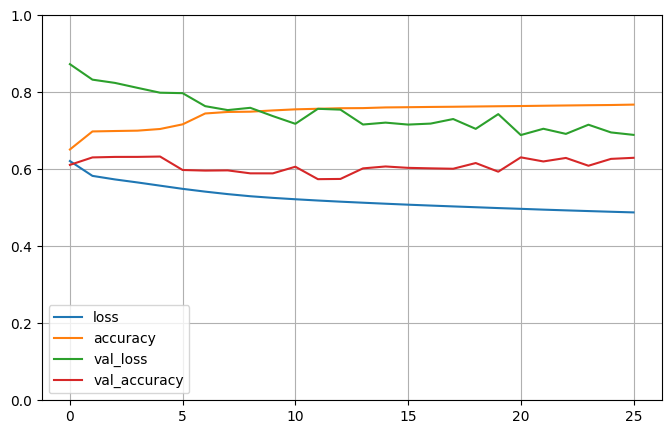

In [56]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

O uso de uma taxa de aprendizado menor (0.0001) levou a uma melhora da Taxa de Acurácia para Validação, com uma tendência mais clara de crescimento. Vamos tentar expandir sobre isso com outros parâmetros.

### 4. Buscando Soluções
Tendo em vista investigar esse fenômeno, vamos analisar como o Modelo da Tentativa 05 performa no gráfico.

In [53]:
modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

otimizador = keras.optimizers.Adam(learning_rate=0.001)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=otimizador, loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_under, y_undersampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
151/151 [==============================] - 3s 7ms/step - loss: 1.0642 - accuracy: 0.6384 - val_loss: 1.1317 - val_accuracy: 0.1296
Epoch 2/100
151/151 [==============================] - 1s 5ms/step - loss: 0.9542 - accuracy: 0.6658 - val_loss: 0.9436 - val_accuracy: 0.6537
Epoch 3/100
151/151 [==============================] - 1s 6ms/step - loss: 0.8914 - accuracy: 0.6839 - val_loss: 0.9227 - val_accuracy: 0.5797
Epoch 4/100
151/151 [==============================] - 1s 5ms/step - loss: 0.8450 - accuracy: 0.7047 - val_loss: 0.9266 - val_accuracy: 0.6470
Epoch 5/100
151/151 [==============================] - 1s 6ms/step - loss: 0.8215 - accuracy: 0.7059 - val_loss: 0.9165 - val_accuracy: 0.6370
Epoch 6/100
151/151 [==============================] - 1s 6ms/step - loss: 0.7977 - accuracy: 0.7080 - val_loss: 0.9007 - val_accuracy: 0.5914
Epoch 7/100
151/151 [==============================] - 1s 5ms/step - loss: 0.7683 - accuracy: 0.7165 - val_loss: 0.8228 - val_accuracy: 0.6736

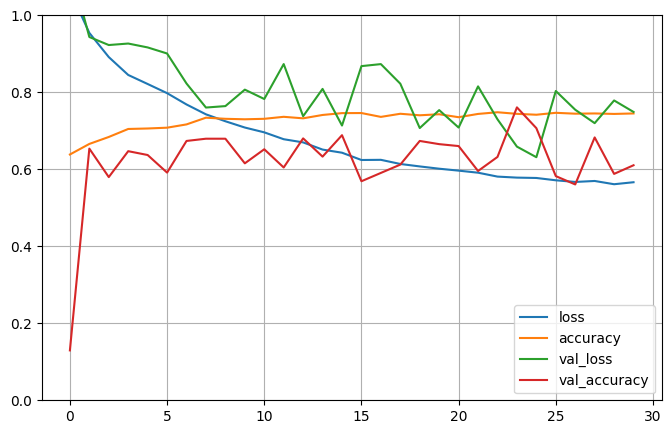

In [54]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

Vamos tentar utilizar técnicas semelhantes a utilizadas no modelo anterior para aumentar a generalização do modelo, e ajustá-lo aos poucos.

#### BatchNormalization e Dropout

In [60]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
3651/3651 [==============================] - 15s 4ms/step - loss: 0.5383 - accuracy: 0.7347 - val_loss: 0.6228 - val_accuracy: 0.6587
Epoch 2/100
3651/3651 [==============================] - 14s 4ms/step - loss: 0.4983 - accuracy: 0.7592 - val_loss: 0.7274 - val_accuracy: 0.5965
Epoch 3/100
3651/3651 [==============================] - 13s 4ms/step - loss: 0.4856 - accuracy: 0.7666 - val_loss: 0.6068 - val_accuracy: 0.6691
Epoch 4/100
3651/3651 [==============================] - 12s 3ms/step - loss: 0.4753 - accuracy: 0.7720 - val_loss: 0.6403 - val_accuracy: 0.6647
Epoch 5/100
3651/3651 [==============================] - 12s 3ms/step - loss: 0.4684 - accuracy: 0.7771 - val_loss: 0.5606 - val_accuracy: 0.7071
Epoch 6/100
3651/3651 [==============================] - 12s 3ms/step - loss: 0.4627 - accuracy: 0.7804 - val_loss: 0.6330 - val_accuracy: 0.6845
Epoch 7/100
3651/3651 [==============================] - 12s 3ms/step - loss: 0.4568 - accuracy: 0.7835 - val_loss: 0.5621 -

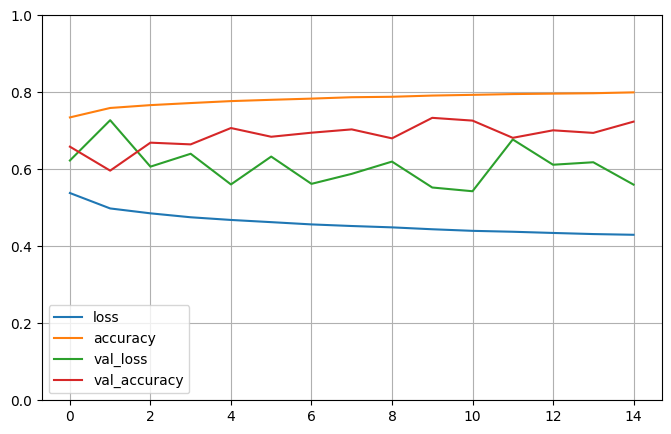

In [61]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

In [65]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
3651/3651 [==============================] - 16s 4ms/step - loss: 0.6518 - accuracy: 0.6658 - val_loss: 0.7088 - val_accuracy: 0.6187
Epoch 2/100
3651/3651 [==============================] - 13s 4ms/step - loss: 0.5671 - accuracy: 0.7189 - val_loss: 0.6967 - val_accuracy: 0.6242
Epoch 3/100
3651/3651 [==============================] - 14s 4ms/step - loss: 0.5378 - accuracy: 0.7367 - val_loss: 0.6578 - val_accuracy: 0.6373
Epoch 4/100
3651/3651 [==============================] - 14s 4ms/step - loss: 0.5232 - accuracy: 0.7460 - val_loss: 0.6274 - val_accuracy: 0.6306
Epoch 5/100
3651/3651 [==============================] - 14s 4ms/step - loss: 0.5124 - accuracy: 0.7532 - val_loss: 0.6317 - val_accuracy: 0.6475
Epoch 6/100
3651/3651 [==============================] - 14s 4ms/step - loss: 0.5056 - accuracy: 0.7564 - val_loss: 0.6425 - val_accuracy: 0.6514
Epoch 7/100
3651/3651 [==============================] - 15s 4ms/step - loss: 0.5003 - accuracy: 0.7599 - val_loss: 0.6358 -

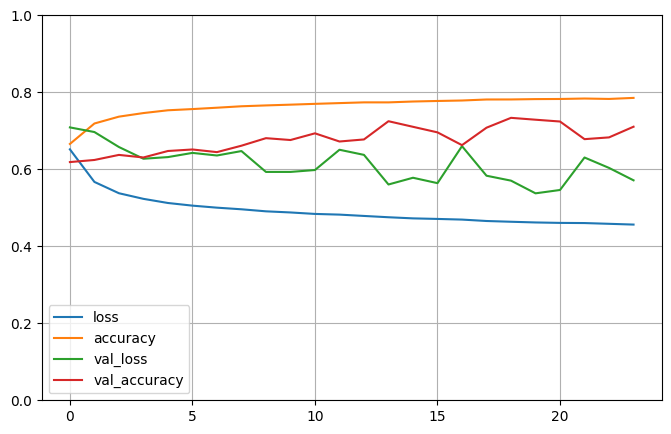

In [66]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

Os resultados não modificarem muito, e o maior valor para a Val_Accuracy ainda é do modelo original. Vamos trabalhar no batch_size.

#### BatchSize

In [67]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=320, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
366/366 [==============================] - 3s 6ms/step - loss: 0.6192 - accuracy: 0.6496 - val_loss: 0.8230 - val_accuracy: 0.6331
Epoch 2/100
366/366 [==============================] - 2s 5ms/step - loss: 0.5685 - accuracy: 0.7021 - val_loss: 0.8006 - val_accuracy: 0.6445
Epoch 3/100
366/366 [==============================] - 2s 5ms/step - loss: 0.5459 - accuracy: 0.7180 - val_loss: 0.7342 - val_accuracy: 0.6606
Epoch 4/100
366/366 [==============================] - 2s 5ms/step - loss: 0.5276 - accuracy: 0.7511 - val_loss: 0.7843 - val_accuracy: 0.5721
Epoch 5/100
366/366 [==============================] - 2s 5ms/step - loss: 0.5156 - accuracy: 0.7586 - val_loss: 0.7520 - val_accuracy: 0.5898
Epoch 6/100
366/366 [==============================] - 2s 5ms/step - loss: 0.5058 - accuracy: 0.7632 - val_loss: 0.7323 - val_accuracy: 0.6066
Epoch 7/100
366/366 [==============================] - 2s 5ms/step - loss: 0.4970 - accuracy: 0.7662 - val_loss: 0.7421 - val_accuracy: 0.5842

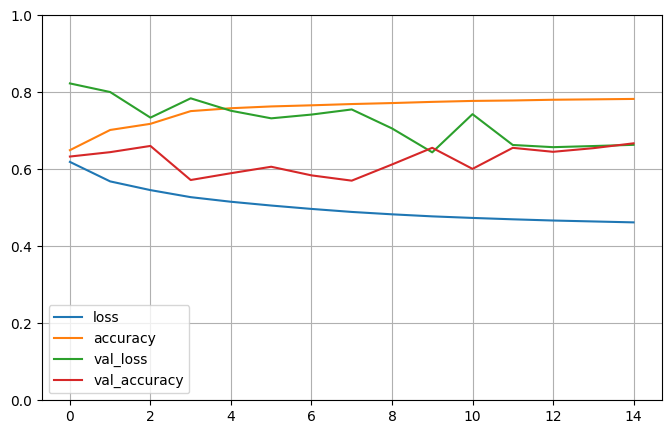

In [68]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

In [69]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=160, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
731/731 [==============================] - 4s 4ms/step - loss: 0.5980 - accuracy: 0.6789 - val_loss: 0.7937 - val_accuracy: 0.6387
Epoch 2/100
731/731 [==============================] - 3s 4ms/step - loss: 0.5490 - accuracy: 0.7247 - val_loss: 0.8127 - val_accuracy: 0.5525
Epoch 3/100
731/731 [==============================] - 3s 4ms/step - loss: 0.5202 - accuracy: 0.7547 - val_loss: 0.7554 - val_accuracy: 0.5725
Epoch 4/100
731/731 [==============================] - 3s 4ms/step - loss: 0.5050 - accuracy: 0.7616 - val_loss: 0.7582 - val_accuracy: 0.5720
Epoch 5/100
731/731 [==============================] - 3s 4ms/step - loss: 0.4951 - accuracy: 0.7660 - val_loss: 0.6867 - val_accuracy: 0.6213
Epoch 6/100
731/731 [==============================] - 3s 4ms/step - loss: 0.4869 - accuracy: 0.7687 - val_loss: 0.6460 - val_accuracy: 0.6455
Epoch 7/100
731/731 [==============================] - 3s 4ms/step - loss: 0.4796 - accuracy: 0.7721 - val_loss: 0.6869 - val_accuracy: 0.6262

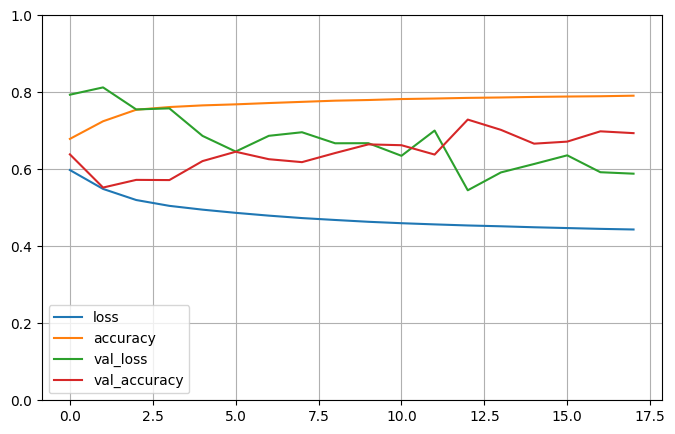

In [70]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

In [71]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=1000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
117/117 [==============================] - 2s 11ms/step - loss: 0.6473 - accuracy: 0.6261 - val_loss: 0.8997 - val_accuracy: 0.0098
Epoch 2/100
117/117 [==============================] - 1s 8ms/step - loss: 0.5962 - accuracy: 0.6759 - val_loss: 0.8696 - val_accuracy: 0.6307
Epoch 3/100
117/117 [==============================] - 1s 8ms/step - loss: 0.5779 - accuracy: 0.7008 - val_loss: 0.8338 - val_accuracy: 0.6296
Epoch 4/100
117/117 [==============================] - 1s 8ms/step - loss: 0.5669 - accuracy: 0.7024 - val_loss: 0.8222 - val_accuracy: 0.6398
Epoch 5/100
117/117 [==============================] - 1s 8ms/step - loss: 0.5547 - accuracy: 0.7070 - val_loss: 0.7710 - val_accuracy: 0.6490
Epoch 6/100
117/117 [==============================] - 1s 8ms/step - loss: 0.5416 - accuracy: 0.7322 - val_loss: 0.7704 - val_accuracy: 0.6198
Epoch 7/100
117/117 [==============================] - 1s 8ms/step - loss: 0.5294 - accuracy: 0.7508 - val_loss: 0.7038 - val_accuracy: 0.638

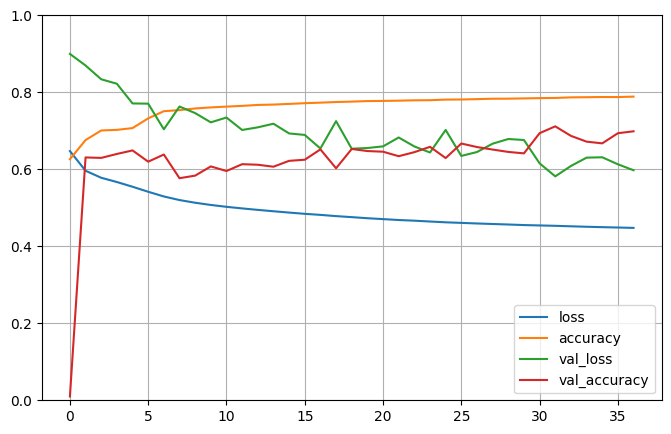

In [72]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

#### Número de Neurônios

In [73]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
3651/3651 [==============================] - 10s 3ms/step - loss: 0.5721 - accuracy: 0.6981 - val_loss: 0.8145 - val_accuracy: 0.5877
Epoch 2/100
3651/3651 [==============================] - 9s 2ms/step - loss: 0.5255 - accuracy: 0.7502 - val_loss: 0.7302 - val_accuracy: 0.6063
Epoch 3/100
3651/3651 [==============================] - 9s 2ms/step - loss: 0.5057 - accuracy: 0.7597 - val_loss: 0.7016 - val_accuracy: 0.6166
Epoch 4/100
3651/3651 [==============================] - 9s 2ms/step - loss: 0.4932 - accuracy: 0.7632 - val_loss: 0.7009 - val_accuracy: 0.6112
Epoch 5/100
3651/3651 [==============================] - 9s 3ms/step - loss: 0.4834 - accuracy: 0.7672 - val_loss: 0.6259 - val_accuracy: 0.6655
Epoch 6/100
3651/3651 [==============================] - 9s 2ms/step - loss: 0.4754 - accuracy: 0.7717 - val_loss: 0.6330 - val_accuracy: 0.6789
Epoch 7/100
3651/3651 [==============================] - 9s 2ms/step - loss: 0.4696 - accuracy: 0.7750 - val_loss: 0.7159 - val_a

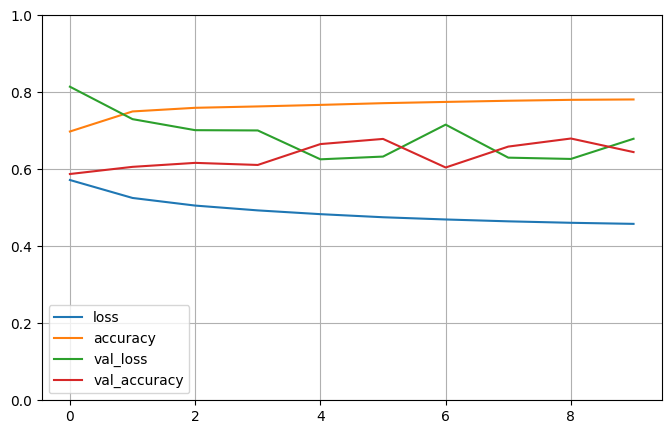

In [74]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

### 5. Busca por Hiperparâmetros
Sair adivinhando parâmetros que podem otimizar o resultado não levou a muitos resultados. Assim, vamos deixar o trabalho para um algoritmo especializado.

In [86]:
from keras_tuner.tuners import RandomSearch

def construir_modelo(hp):
    modelo = keras.Sequential()
    modelo.add(keras.layers.Input(shape=dataset.shape[1:]))
    
    unidades = hp.Int('units', min_value=32, max_value=512, step=32)
    modelo.add(keras.layers.Dense(units=unidades, activation='relu'))
    modelo.add(keras.layers.Dense(units=unidades, activation='relu'))
    modelo.add(keras.layers.Dense(units=unidades, activation='relu'))
    modelo.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune a taxa de aprendizado
    taxa_aprendizado = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
    
    modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=taxa_aprendizado),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return modelo

In [88]:
tuner = RandomSearch(
    construir_modelo,
    objective='val_accuracy',
    max_trials=10
)

tuner.search(dataset_smote, y_oversampling, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Trial 10 Complete [00h 02m 00s]
val_accuracy: 0.5764081478118896

Best val_accuracy So Far: 0.8071905374526978
Total elapsed time: 00h 40m 34s


##### Resultados
Durante a execução, os modelos de melhor resultado usaram a taxa de aprendizado 0.001 e um maior número de neurônios, com o melhor sendo 512. Como um modelo com uma taxa menor - 0.0001 - e 448 neurônios teve um resultado próximo, eu acredito que o número de neurônios é o fator necessário para aumentar o val_score.

In [95]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
units: 512
learning_rate: 0.001
Score: 0.8071905374526978

Trial 08 summary
Hyperparameters:
units: 448
learning_rate: 0.0001
Score: 0.8014380931854248

Trial 05 summary
Hyperparameters:
units: 448
learning_rate: 0.001
Score: 0.7898305058479309

Trial 06 summary
Hyperparameters:
units: 256
learning_rate: 1e-05
Score: 0.6807738542556763

Trial 09 summary
Hyperparameters:
units: 32
learning_rate: 0.1
Score: 0.5764081478118896

Trial 02 summary
Hyperparameters:
units: 64
learning_rate: 0.01
Score: 0.00013696284440811723

Trial 04 summary
Hyperparameters:
units: 384
learning_rate: 0.1
Score: 0.0

Trial 03 summary
Hyperparameters:
units: 160
learning_rate: 0.01
Score: 0.0

Trial 01 summary
Hyperparameters:
units: 64
learning_rate: 0.1
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/base_t

In [96]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
3651/3651 [==============================] - 27s 7ms/step - loss: 0.5062 - accuracy: 0.7554 - val_loss: 0.6553 - val_accuracy: 0.6284
Epoch 2/100
3651/3651 [==============================] - 26s 7ms/step - loss: 0.4764 - accuracy: 0.7741 - val_loss: 0.6831 - val_accuracy: 0.5966
Epoch 3/100
3651/3651 [==============================] - 26s 7ms/step - loss: 0.4633 - accuracy: 0.7815 - val_loss: 0.7411 - val_accuracy: 0.6451
Epoch 4/100
3651/3651 [==============================] - 26s 7ms/step - loss: 0.4515 - accuracy: 0.7862 - val_loss: 0.7179 - val_accuracy: 0.6511
Epoch 5/100
3651/3651 [==============================] - 26s 7ms/step - loss: 0.4413 - accuracy: 0.7919 - val_loss: 0.5542 - val_accuracy: 0.7460
Epoch 6/100
3651/3651 [==============================] - 26s 7ms/step - loss: 0.4321 - accuracy: 0.7968 - val_loss: 0.5551 - val_accuracy: 0.7254
Epoch 7/100
3651/3651 [==============================] - 26s 7ms/step - loss: 0.4244 - accuracy: 0.8007 - val_loss: 0.5631 -

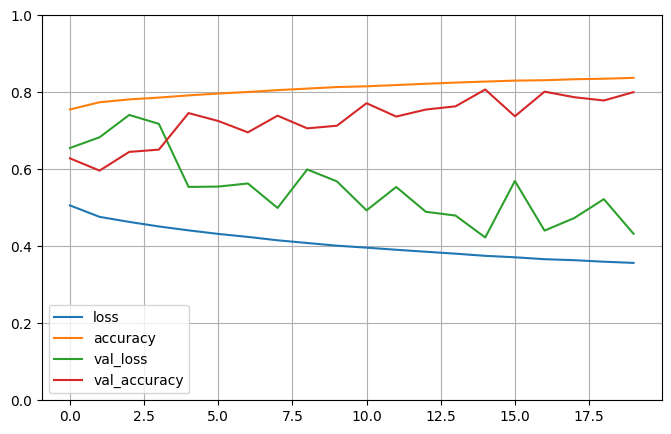

In [97]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

Esse é o melhor resultado, mas, como uma última tentativa, vamos tentar generalizar ainda mais o modelo com uma Selu.

In [98]:
from keras.optimizers import Adam

modelo = keras.Sequential([
    keras.layers.Input(shape=dataset.shape[1:]),
    keras.layers.Dense(512, activation='selu'),
    keras.layers.Dense(512, activation='selu'),
    keras.layers.Dense(512, activation='selu'),
    keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(dataset_smote, y_oversampling, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
3651/3651 [==============================] - 31s 8ms/step - loss: 0.5260 - accuracy: 0.7445 - val_loss: 0.8012 - val_accuracy: 0.5646
Epoch 2/100
3651/3651 [==============================] - 28s 8ms/step - loss: 0.4938 - accuracy: 0.7629 - val_loss: 0.6525 - val_accuracy: 0.6789
Epoch 3/100
3651/3651 [==============================] - 28s 8ms/step - loss: 0.4878 - accuracy: 0.7668 - val_loss: 0.7259 - val_accuracy: 0.6078
Epoch 4/100
3651/3651 [==============================] - 28s 8ms/step - loss: 0.4814 - accuracy: 0.7710 - val_loss: 0.8965 - val_accuracy: 0.5594
Epoch 5/100
3651/3651 [==============================] - 28s 8ms/step - loss: 0.4758 - accuracy: 0.7743 - val_loss: 0.7895 - val_accuracy: 0.6030
Epoch 6/100
3651/3651 [==============================] - 28s 8ms/step - loss: 0.4729 - accuracy: 0.7753 - val_loss: 0.6437 - val_accuracy: 0.7276
Epoch 7/100
3651/3651 [==============================] - 28s 8ms/step - loss: 0.4676 - accuracy: 0.7779 - val_loss: 0.7598 -

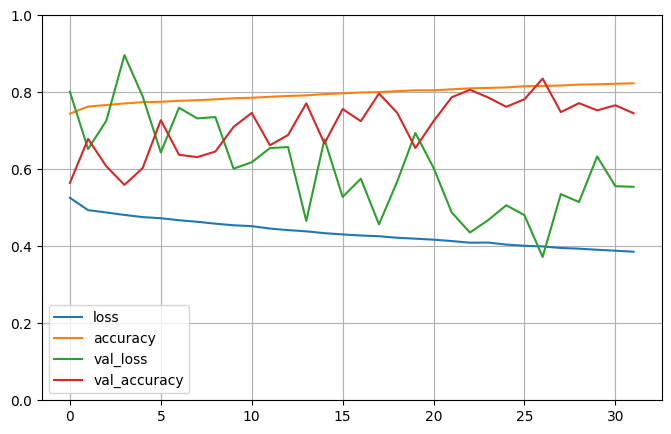

In [99]:
import matplotlib.pyplot as plt

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

A SELU trouxe um crescimento de performance interessante. Esse será o modelo final.

### 6. Resultado

In [100]:
alvo = pd.read_csv("/kaggle/input/santander-customer-satisfaction/test.csv")

alvo_id = alvo.ID
alvo.drop(columns = "ID", inplace = True)

scaler = MinMaxScaler()

copia = alvo.copy()
copia = scaler.fit_transform(copia)

alvo = pd.DataFrame(copia, columns = alvo.columns)
alvo.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.999764,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001361
1,0.999764,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001533
2,0.999764,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001585
3,0.999764,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.006462
4,0.999764,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.002507


In [101]:
alvo = alvo.drop(columns = COLUNAS_CONSTANTES)
alvo.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.999764,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001361
1,0.999764,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001533
2,0.999764,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.001585
3,0.999764,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.006462
4,0.999764,0.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000004,0.000004,0.0,0.0,0.0,0.0,0.002507


In [102]:
resultados = modelo.predict(alvo)

2370/2370 [==============================] - 8s 3ms/step


In [103]:
binary_predictions = (resultados > 0.5).astype(int)
resposta = pd.concat([alvo_id, pd.Series(binary_predictions.flatten(), name = "TARGET")], axis = 1)
resposta

,ID,TARGET
0,2,0
1,5,1
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,1


In [104]:
resposta.to_csv("resposta.csv", index = False)